# Problem 7-8-9
### Suleyman Gozen
I thank Yung-Hsu Tsui for his valuable comments.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
from itertools import cycle
%matplotlib inline

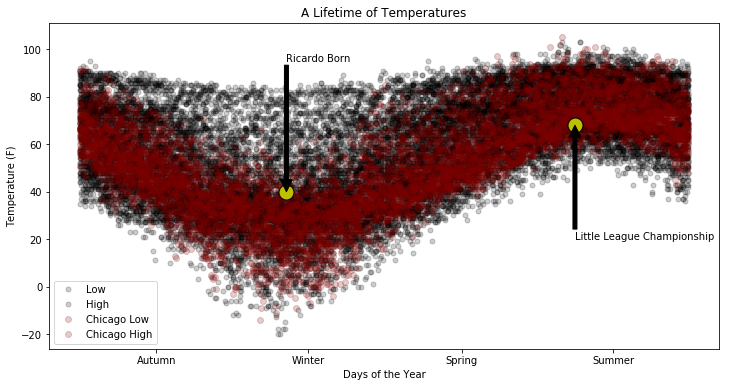

In [7]:
""" Problem 7 """

Indi = pd.read_csv('Indi.csv')
Pitt = pd.read_csv('Pitt.csv')
Miam = pd.read_csv('Miam.csv')
Wash = pd.read_csv('Wash.csv')
Chic = pd.read_csv('Chic.csv')

cities= [Indi, Pitt, Miam, Wash]
city = pd.concat(cities)

city["DATE"]= pd.to_datetime(city["DATE"],format="%Y%m%d")
city["DAY"]= (pd.DatetimeIndex(city["DATE"]).dayofyear - 264)%366
Chic["DATE"]= pd.to_datetime(Chic["DATE"],format="%Y%m%d")
Chic["DAY"]= (pd.DatetimeIndex(Chic["DATE"]).dayofyear - 264)%366

fig = plt.figure(figsize=(12,6))
plt.plot(city['DAY'], city['TMIN'], 'o', alpha=0.2, color='k' ,markersize = 5, label="Low")
plt.plot(city['DAY'], city['TMAX'], 'o', alpha=0.2, color='k' ,markersize = 5, label="High")
plt.plot(Chic['DAY'], Chic['TMIN'], 'o', alpha=0.2, color='Maroon', label="Chicago Low")
plt.plot(Chic['DAY'], Chic['TMAX'], 'o', alpha=0.2, color='Maroon', label="Chicago High")

plt.plot(124,40,'o',color='y',alpha=1, markersize = 15,markeredgecolor='k')
plt.annotate("Ricardo Born", xy=(124, 40), xytext=(124, 95), arrowprops=dict(facecolor='black'))
plt.plot(297,68,'o',color='y',fillstyle='full',markersize=15,markeredgecolor='k')
plt.annotate("Little League Championship", xy=(297, 68), xytext=(297, 20), arrowprops=dict(facecolor='black'))

vals=[46,137,229,320]
labels=['Autumn','Winter','Spring','Summer']
plt.xticks(vals,labels)
plt.xlabel("Days of the Year")
plt.ylabel("Temperature (F)")
plt.title("A Lifetime of Temperatures")
plt.legend()
plt.show()

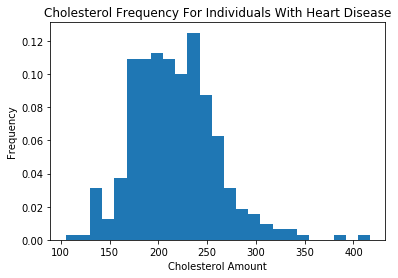

'\nWe see that individuals who have heart disease also have moderate to low\nlevels of both Cholesterol and Trigliceride. This relationship can probably be inverted:\nInvidiauls with  moderate to low levels of both Cholesterol and Trigliceride may be more likely\nto get heart disease. \n'

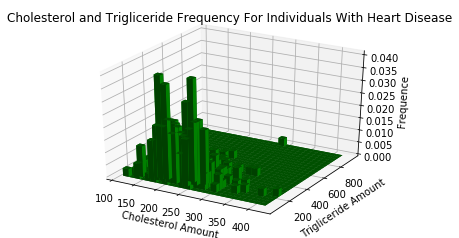

In [3]:
""" Problem 8 """
lipids = pd.read_csv('lipids.csv', skiprows = 4)
lipids = lipids[lipids.diseased == 1]

#Part A
weights = (1/lipids["chol"].shape[0]) * np.ones_like(lipids["chol"])
n, bin_cuts, patches = plt.hist(lipids["chol"], 25, weights = weights)
plt.title("Cholesterol Frequency For Individuals With Heart Disease")
plt.xlabel("Cholesterol Amount")
plt.ylabel("Frequency")
plt.show()
""" The Bin with the highest frequence is bin 11 and its midpoint is (229.8 +  242.28)/2 = 236.04 """

#Part B
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
hist, xedges, yedges = np.histogram2d(lipids["chol"], lipids["trig"], bins=25)
hist = hist / hist.sum()
x_midp = xedges[:-1] + 0.5 * (xedges[1] - xedges[0])
y_midp = yedges[:-1] + 0.5 * (yedges[1] - yedges[0])
elements = (len(xedges) - 1) * (len(yedges) - 1)
ypos, xpos = np.meshgrid(y_midp, x_midp)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)
dx = (xedges[1] - xedges[0]) * np.ones_like(25)
dy = (yedges[1] - yedges[0]) * np.ones_like(25)
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='g', zsort='average')
ax.set_xlabel("Cholesterol Amount")
ax.set_ylabel("Trigliceride Amount")
ax.set_zlabel("Frequence")
plt.title("Cholesterol and Trigliceride Frequency For Individuals With Heart Disease")

#Part C

"""
We see that individuals who have heart disease also have moderate to low
levels of both Cholesterol and Trigliceride. This relationship can probably be inverted:
Invidiauls with  moderate to low levels of both Cholesterol and Trigliceride may be more likely
to get heart disease. 
"""

In [ ]:
""" Problem 9 """

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
from itertools import cycle
%matplotlib inline

#Import data
df = pd.read_csv("payems.csv", skiprows=5)
df["date"] = pd.to_datetime(df["date"])
df.index = df["date"] 

peak = [datetime(1929, 8, 1), datetime(1937, 5, 1),datetime(1945, 2, 1), datetime(1948, 11, 1), \
        datetime(1953, 7, 1), datetime(1957, 8, 1),datetime(1960, 4, 1), datetime(1969, 12, 1), \
        datetime(1973, 11, 1),datetime(1980, 1, 1), datetime(1981, 7, 1),datetime(1990, 7, 1), \
        datetime(2001, 3, 1), datetime(2007, 12, 1)]

#Part A
df_list = []
for i, date in enumerate(peak):
    if date == '1929-08-01' :
        start = pd.to_datetime('1929-07-01')
    else:
        start = pd.to_datetime(str(date.year-1)+'-'+str(date.month)+'-'+str(date.day))
    end = pd.to_datetime(str(date.year+7)+'-'+str(date.month)+'-'+str(date.day))
    temp = df[(df['date'] >= start)& (df['date'] <= end)]
    temp["start"] = str(date.year)+'-'+str(date.month)+'-'+str(date.day)
    temp.name = str(date)
    df_list.append(temp)


#Part B: Normalize
for i, date in enumerate(peak):
    if i > 1 :
        norm = df_list[i].loc[(df_list[i]["date"] == date),"payems"][0]
        df_list[i]["Normed"] = df_list[i]["payems"]/norm

norm0 = df_list[0].loc[(df_list[0]["date"] == '1929-07-01'),"payems"][0]
df_list[0]["Normed"] = df_list[0]["payems"]/norm0

norm1 = df_list[1].loc[(df_list[1]["date"] == '1937-07-01'),"payems"][0]
df_list[1]["Normed"] = df_list[1]["payems"]/norm1


#Part C-I: Plot Time Series
fig= plt.figure(figsize=(10, 5))
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

x = np.linspace(0,8,97)
x_r1 = np.linspace(0,8,68)
x_r0 = np.linspace(1,8,8)


for i, df in enumerate(df_list):
    if i == 0:
        plt.plot(x_r0, df["Normed"], "k-", lw = 4, label = df["start"][0])
    elif i==13:
        plt.plot(x, df["Normed"], "r-", lw = 4 ,label = df["start"][0])
    elif i==1:
        plt.plot(x_r1, df["Normed"], next(linecycler), lw = 1, label = df["start"][0])
    else:
        plt.plot(x, df["Normed"], next(linecycler), lw = 1, label = df["start"][0])
        
        
plt.axhline(y = 1,  ls = "--", color ="grey")
plt.axvline(x = 1,  ls = "--", color ="grey")
xlabel=['-1yr','peak','+1yr','+2yr','+3yr','+4yr','+5yr','+6yr','+7yr']
xval = [0,1,2,3,4,5,6,7,8]
plt.xticks(xval, xlabel)
plt.xlabel("Time from peak")
plt.ylabel("Jobs/peak")
plt.title("Recessions from 1857")
plt.legend()

#Part J,K
"""
Although there are a few recessions 
that have smaller job/peak than the great recession, the other 
depressions quickly increase, whereas the great recession continues
to have poor employment. 

We see that Great Depression was worse than the 
Great Recession, both in duration of low job/peak but also magnitude of 
job/peak. 
"""